In [53]:
!pip install --upgrade scikit-learn imbalanced-learn



  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata (11 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importamos todas las librerias necesarias 

In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import squarify

Importamons nuestros datos


In [2]:
#link al dataset: https://www.kaggle.com/datasets/dansbecker/powerlifting-database/data?select=openpowerlifting.csv
df = pd.read_csv("https://media.githubusercontent.com/media/matiespinel/proyecto-coder/refs/heads/main/openpowerlifting.csv")

C:\Users\usuario\AppData\Local\Temp\ipykernel_23772\2988935497.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://media.githubusercontent.com/media/matiespinel/proyecto-coder/refs/heads/main/openpowerlifting.csv")


In [3]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


Explicacion resumida de cada columna que requiere especificacion :
- Event: Que tipo de movimeintos se realizaron (Squat, Bench, Deadlift)
- Equipment : Tipo de equipamiento utilizado en el levantamiento (Wraps, Raw(sin nada), 'Single-ply' 'Multi-ply' 'Straps'), no todos se permiten en todas las competencias 
- Division: Todas las posibles divisiones de genero (cambian segun asociacion)
- Age Class: Divisiones de grupos de competicion por edad
- Wheight Class: divisiones por peso
- Lift1/2/3/4Kg: numer ode levantamiento de la persona y su valor en kilos(si es negativo es que fallo)
- Total: La suma total de sus mejores 3 levantamientos
- Wilks/McCulloch/Glossbrenner: formulas medidioras de fuerza para determinar al mejor levantador por fuera de su sexo
- IPFPoints: Formula usada por la asociacion internacional de power
- Tested: Se verifico que el levantador estubiera limpio de drogas

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [5]:
df["Place"].unique()

array(['4', '2', '1', '3', '5', '7', '6', '9', 'DQ', '8', '11', '12',
       '13', '15', '10', '14', '18', '16', '17', '19', '25', '32', '23',
       '24', '27', '28', '29', '21', '26', '31', '22', '30', '20', '33',
       '34', '36', '37', 'G', '35', '38', 'NS', 'DD', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '99', '57', '58', '59', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95',
       '96', '97', '98', '100', '101', '102', '103', '104', '105', '106',
       '107', '108', '109', '110', '111', '112', '113', '114', '115',
       '116', '117', '118', '119', '120'], dtype=object)

In [6]:
df.shape

(1423354, 38)

In [7]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName', 'Year'],
      dtype='object')

In [8]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints,Date,Year
count,757527.000000,1.406622e+06,337580.000000,333349.000000,323842.000000,3696.000000,1.031450e+06,499779.000000,493486.000000,478485.000000,...,339947.000000,9246.000000,1.081808e+06,1.313184e+06,1.304407e+06,1.304254e+06,1.304407e+06,1.273286e+06,1423354,1.423354e+06
mean,31.501570,8.422503e+01,114.102442,92.155846,30.056842,71.356870,1.740049e+02,83.892373,55.065745,-18.520481,...,12.995484,78.914945,1.872585e+02,3.956148e+02,2.882247e+02,2.960682e+02,2.718484e+02,4.854330e+02,2012-04-24 23:52:12.354144256,2.011929e+03
min,0.000000,1.510000e+01,-555.000000,-580.000000,-600.500000,-550.000000,-4.775000e+02,-480.000000,-507.500000,-575.000000,...,-587.500000,-461.000000,-4.100000e+02,2.500000e+00,1.470000e+00,1.470000e+00,1.410000e+00,2.160000e+00,1964-09-05 00:00:00,1.964000e+03
25%,21.000000,6.670000e+01,90.000000,68.000000,-167.500000,-107.840000,1.224700e+02,57.500000,-52.500000,-140.000000,...,-210.000000,-110.000000,1.383500e+02,2.325000e+02,1.979000e+02,2.048200e+02,1.828100e+02,4.028600e+02,2011-01-15 00:00:00,2.011000e+03
50%,28.000000,8.180000e+01,147.500000,145.000000,110.000000,135.000000,1.678300e+02,105.000000,95.000000,-60.000000,...,117.500000,145.150000,1.850000e+02,3.787500e+02,3.052000e+02,3.120300e+02,2.859400e+02,4.780500e+02,2015-02-15 00:00:00,2.015000e+03
75%,40.000000,9.915000e+01,200.000000,205.000000,192.500000,205.000000,2.175000e+02,145.000000,145.000000,117.500000,...,205.000000,210.000000,2.300000e+02,5.400000e+02,3.745600e+02,3.837600e+02,3.552800e+02,5.597000e+02,2017-05-20 00:00:00,2.017000e+03
max,97.000000,2.580000e+02,555.000000,566.990000,560.000000,505.500000,5.750000e+02,467.500000,487.500000,478.540000,...,457.500000,418.000000,5.850000e+02,1.367500e+03,7.793800e+02,8.044000e+02,7.429600e+02,1.245930e+03,2019-04-20 00:00:00,2.019000e+03
std,13.371707,2.322011e+01,147.143021,173.701524,200.413385,194.522045,6.923931e+01,105.196350,130.302229,144.225726,...,215.052488,192.605159,6.232821e+01,2.011420e+02,1.231805e+02,1.249700e+02,1.175571e+02,1.133489e+02,NaN,8.072615e+00


Conteo de nulos por categoria

<Axes: >

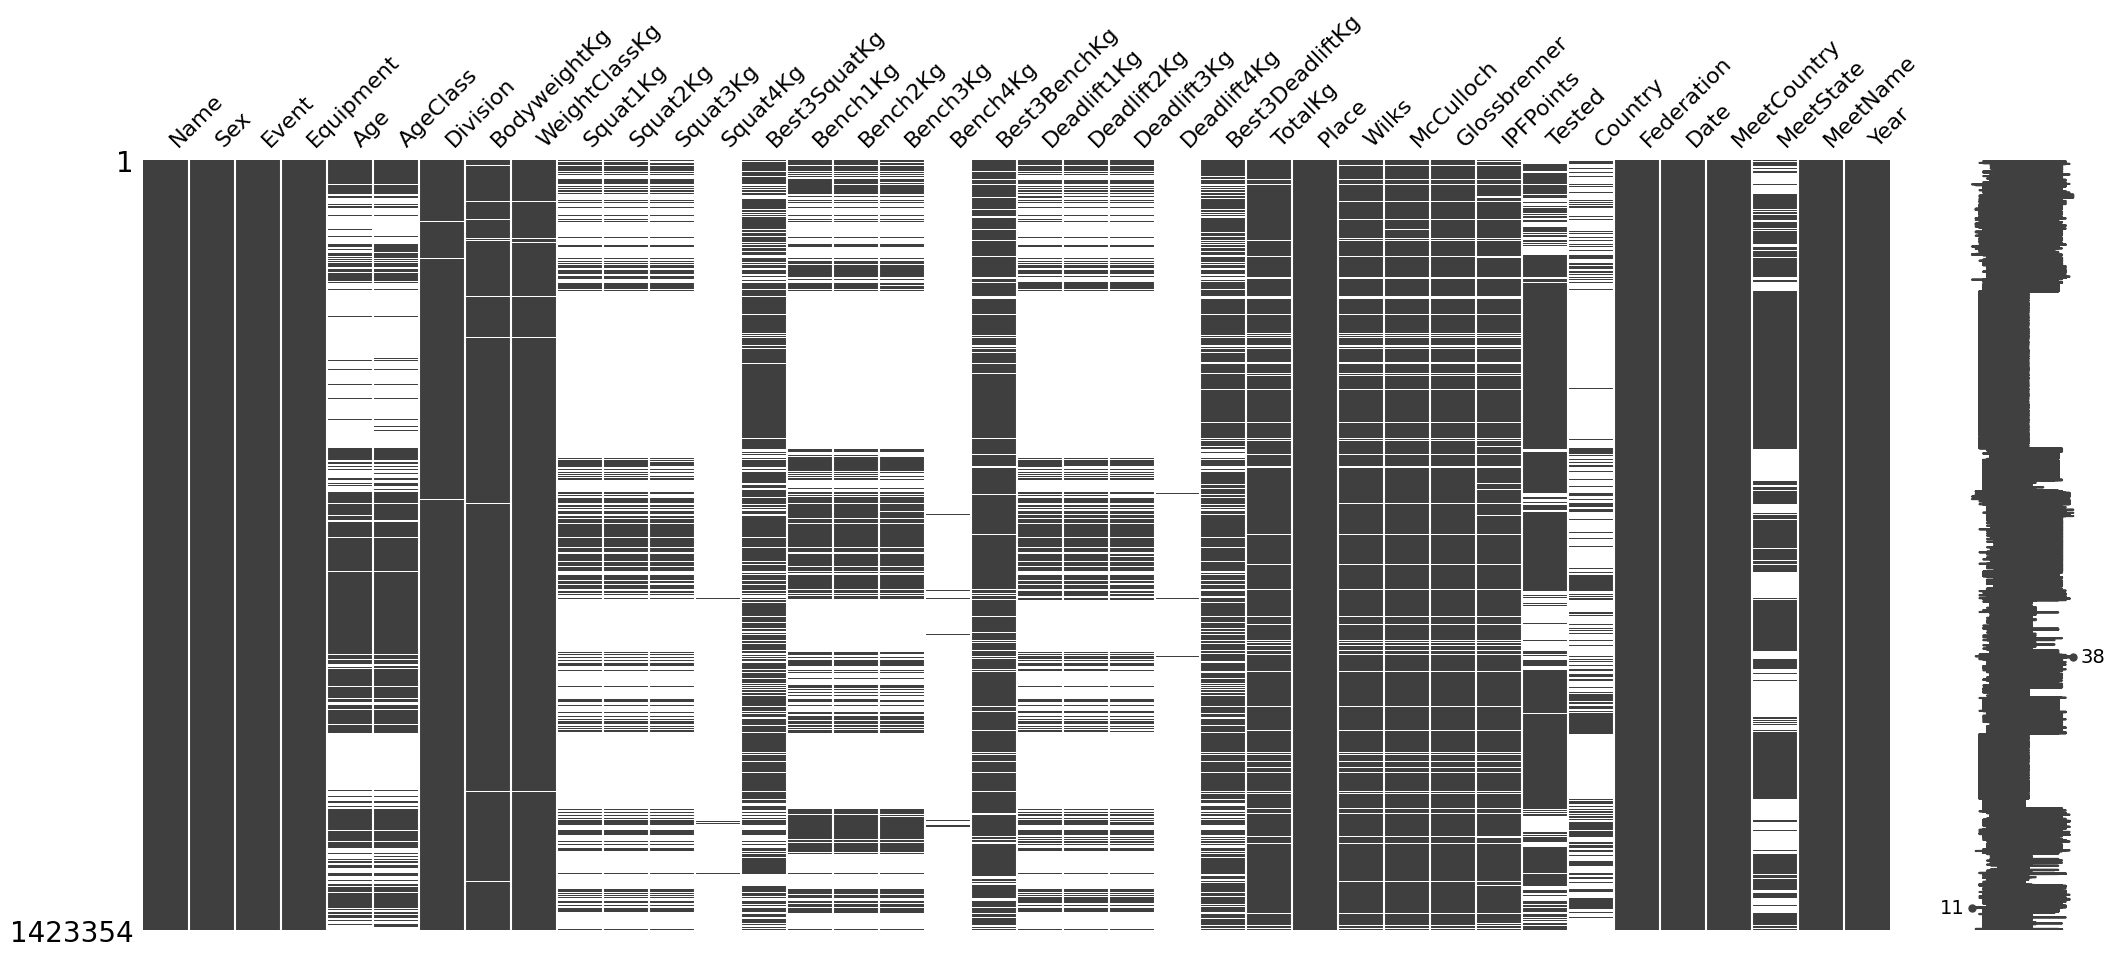

In [9]:
import missingno as msno
msno.matrix(df)

In [10]:
nulos_por_columna = df.isnull().sum().sort_values(ascending=False)

In [11]:
nulos_df = nulos_por_columna.reset_index()
nulos_df.columns = ['columna', 'nulos']

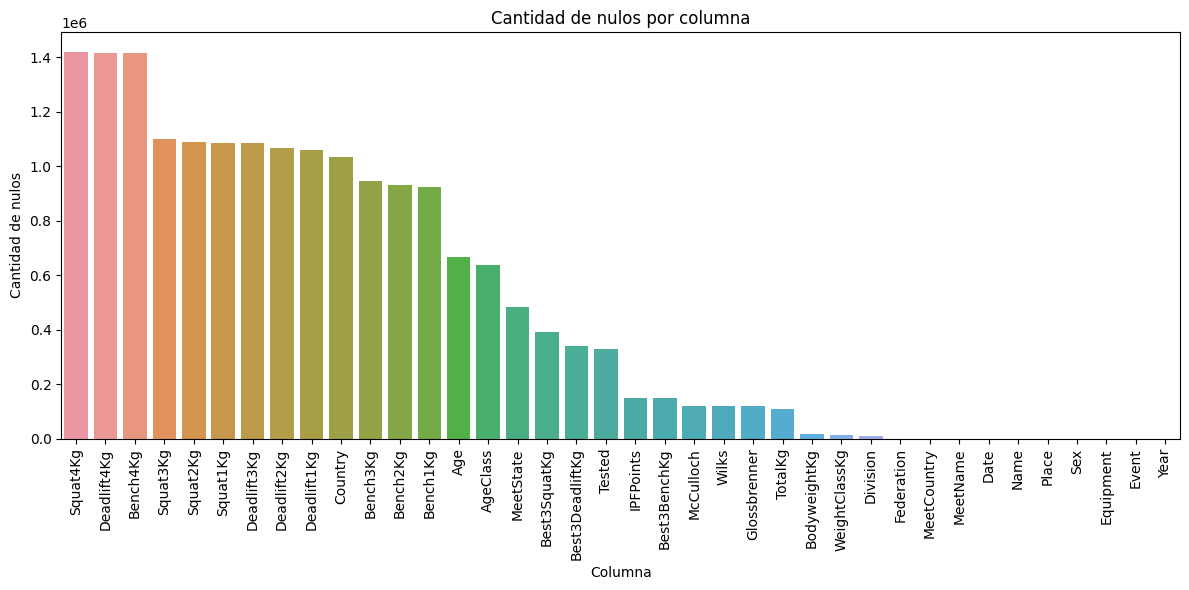

In [12]:
# Create bars
plt.figure(figsize=(12, 6))  # Ajusta el tamaño si tienes muchas columnas
sns.barplot(data=nulos_df, x='columna', y='nulos')
plt.xticks(rotation=90)  # Rota etiquetas para que no se encimen
plt.title('Cantidad de nulos por columna')
plt.xlabel('Columna')
plt.ylabel('Cantidad de nulos')
plt.tight_layout()
plt.show()

Estos datos de nulos nos ayudan tambien a comprender como funcionan las competiciones y las decisiones de cada competidor:
- La categoria con mayor cantida de nulos se debe a que en algunos casos las competencias permiten un 4 movimiento al competidor con el fin de establecer un nuevo record, por eso es que hay tantos nulos, esto demuestra lo poco recurrente que es que se rompa un record
- Para el resto de categorias de levantamientos los nulos tambien muestran las elecciones de los atletas, si bien las competencias convencionales suelen ser SBD (Squat, Bench, Deadlift), algunos competidores eligen hacer uno o dos movimientos en vez de los 3 a la vez (esto generalmente ser debe a que estan enfocados en un solo movimento)
- Los nulos en las colunas de locacion se debe a que al ser realizadas en diferentes paises no siempre se registra la ciudad exacta o localidad de donde se realiza la competencia
- En tested, la presencia de nuos indica que las comptenecias realizadas no probaron que los atletas esten bajo el efecto de drogas ya que no lo requerian 


Al prsentar tantos nulos de forma aleatoria la variable de edad y wheightclasskg, decidi rellenar por la media para su clase de peso y sexo

In [13]:
# Asegurarse de que WeightClassKg sea numérica
df['WeightClassKg'] = pd.to_numeric(df['WeightClassKg'], errors='coerce')

# Calcular la media por sexo
mean_by_sex = df.groupby('Sex')['WeightClassKg'].transform('mean')

# Rellenar nulos con la media correspondiente al sexo
df['WeightClassKg'] = df['WeightClassKg'].fillna(mean_by_sex)


In [14]:
df['Age'] = df.groupby(['Sex', 'WeightClassKg'])['Age'].transform(lambda x: x.fillna(x.mean()))


In [15]:
df["Age"].isnull().sum()

511

In [16]:
df = df.dropna(subset=['Age'])

In [17]:
df['IPFPoints'] = df['IPFPoints'].fillna(0)
df['TotalKg'] = df['TotalKg'].fillna(0)
df['Best3SquatKg'] = df['Best3SquatKg'].fillna(0)
df['Best3BenchKg'] = df['Best3BenchKg'].fillna(0)
df['Best3DeadliftKg'] = df['Best3DeadliftKg'].fillna(0)

correlación entre datos

In [18]:
#sacando valores categoricos a numericos
le = LabelEncoder()
columnas_seleccionadas = [
    'Age', 'AgeClass', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg',
    'Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg', 'BodyweightKg',
    'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Equipment',
    'Event', 'Glossbrenner', 'IPFPoints', 'McCulloch', 'Sex', 'Squat1Kg',
    'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'TotalKg', 'Wilks'
]
dfcorr = df[columnas_seleccionadas]
dfcorr.head()

,Age,AgeClass,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Best3DeadliftKg,Best3SquatKg,BodyweightKg,...,Glossbrenner,IPFPoints,McCulloch,Sex,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,TotalKg,Wilks
0,29.0,24-34,45.0,50.0,55.0,NaN,55.0,130.0,105.0,59.8,...,286.42,511.15,324.16,F,80.0,92.5,105.0,NaN,290.0,324.16
1,29.0,24-34,55.0,62.5,67.5,NaN,67.5,145.0,120.0,58.5,...,334.16,595.65,378.07,F,100.0,110.0,120.0,NaN,332.5,378.07
2,40.0,40-44,27.5,32.5,-35.0,NaN,32.5,0.0,0.0,55.4,...,34.12,313.97,38.56,F,NaN,NaN,NaN,NaN,32.5,38.56
3,23.0,20-23,67.5,72.5,-75.0,NaN,72.5,132.5,105.0,60.0,...,305.37,547.04,345.61,F,-105.0,-105.0,105.0,NaN,310.0,345.61
4,45.0,45-49,70.0,75.0,80.0,NaN,80.0,170.0,140.0,104.0,...,274.56,550.08,338.91,F,120.0,130.0,140.0,NaN,390.0,321.25


In [19]:
for col in ['Sex', 'Equipment', 'AgeClass','Event']:
    if col in dfcorr.columns:
        dfcorr[col] = le.fit_transform(dfcorr[col])




C:\Users\usuario\AppData\Local\Temp\ipykernel_23772\4175109553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcorr[col] = le.fit_transform(dfcorr[col])
C:\Users\usuario\AppData\Local\Temp\ipykernel_23772\4175109553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcorr[col] = le.fit_transform(dfcorr[col])
C:\Users\usuario\AppData\Local\Temp\ipykernel_23772\4175109553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [20]:
dfcorr.shape

(1422843, 26)

In [21]:
b=dfcorr.corr()

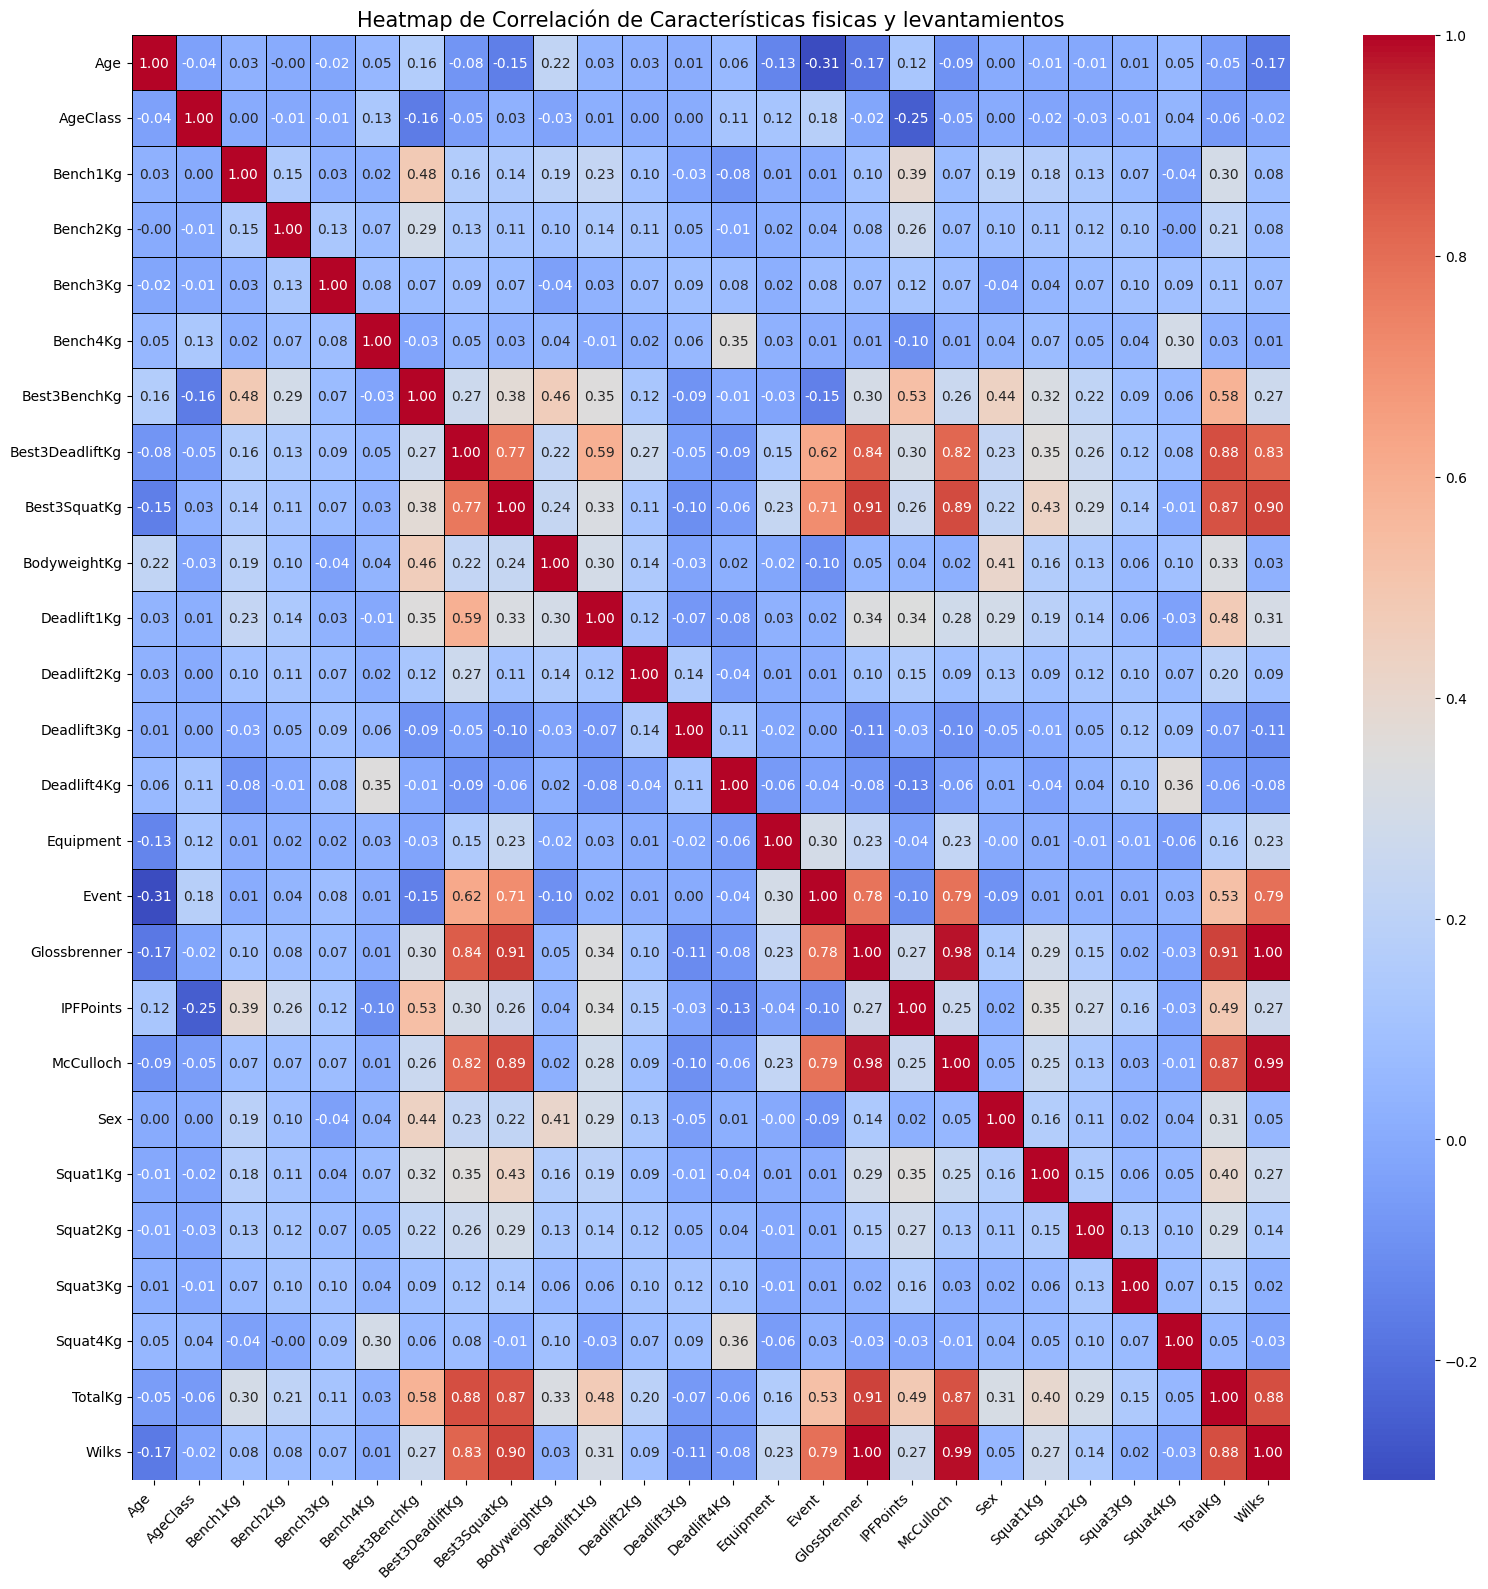

In [22]:

plt.figure(figsize=(16, 16)) 
a = sns.heatmap(b,
    annot=True,      # Muestra los valores de correlación en las celdas
    cmap='coolwarm', # Paleta de colores
    fmt=".2f",       # Formato de los números (2 decimales)
    linewidths=.5,   # Líneas entre celdas
    linecolor='black',# Color de las líneas
    cbar=True        # Muestra la barra de color
)
plt.title('Heatmap de Correlación de Características fisicas y levantamientos', fontsize=15)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para mejor legibilidad
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta el layout para que todo quepa bien
plt.savefig("correlaciones.svg")  # formato vectorial, no se pixela
plt.show()

Se pueden notar muchas tendencias dentro de las correlaciones:
- Los sistemas de puntaje tienen una alta relacion lineal positiva con los valores de los levantamientos ya que toman la mayoria de los valores de ahi, tambien entre ellos como los metodos de calculo varian muy poco tiene correlaciones muy altas
- Podemos notar tambien que los valores de Los mejores 3 levantamientos son altamente correltaivos entre si, es decir que a regla general un valor alto de Bench, deadlift o squat indca que se tienen valores altos e los otros.  

In [23]:
#grafico de corr para la presentacion 
df_corr_segundo_graf = dfcorr.drop(['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg','Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg','Squat1Kg',
    'Squat2Kg', 'Squat3Kg', 'Squat4Kg' ], axis=1)

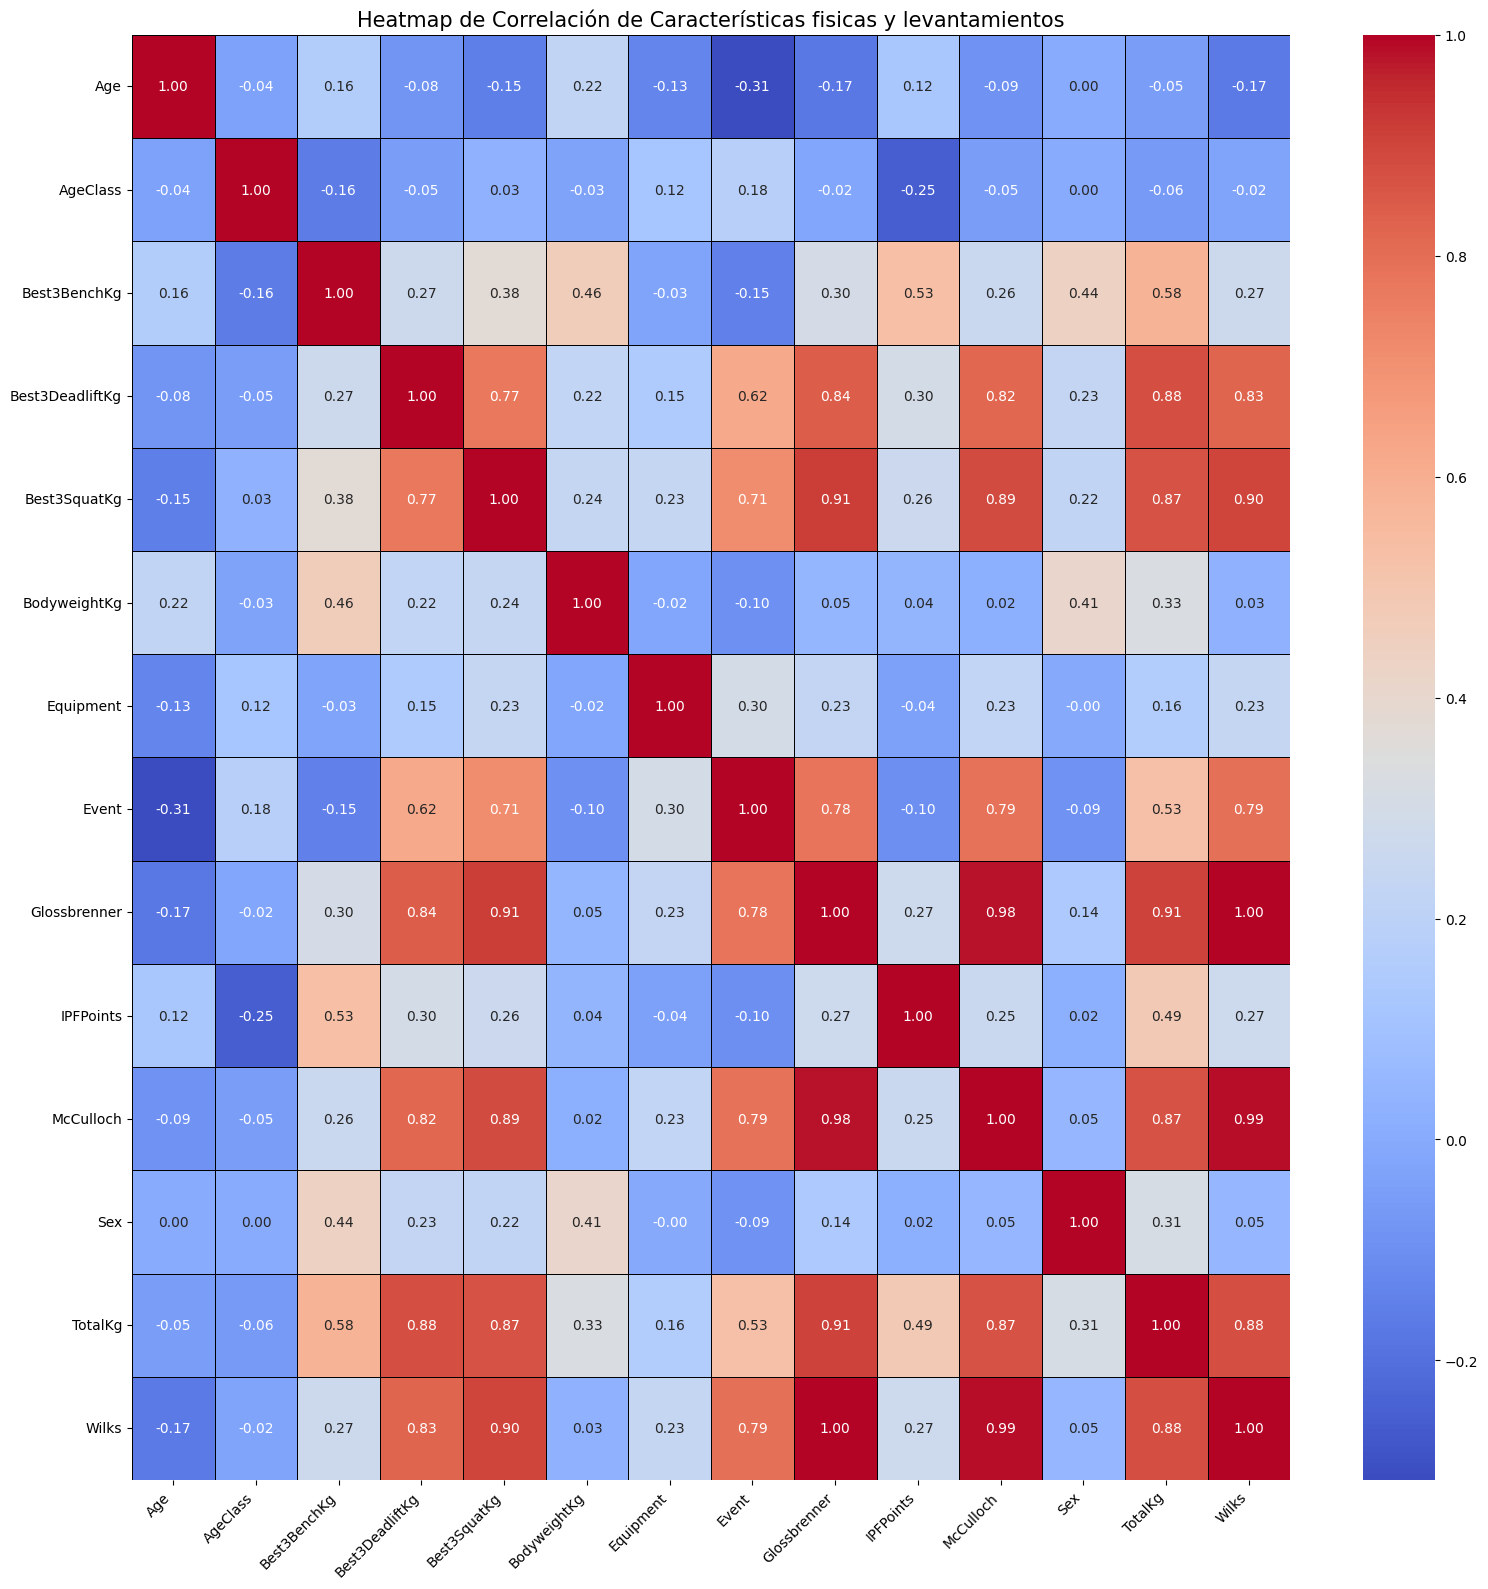

In [24]:
c = df_corr_segundo_graf.corr()
plt.figure(figsize=(16, 16)) 
a = sns.heatmap(c,
    annot=True,      # Muestra los valores de correlación en las celdas
    cmap='coolwarm', # Paleta de colores
    fmt=".2f",       # Formato de los números (2 decimales)
    linewidths=.5,   # Líneas entre celdas
    linecolor='black',# Color de las líneas
    cbar=True        # Muestra la barra de color
)
plt.title('Heatmap de Correlación de Características fisicas y levantamientos', fontsize=15)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para mejor legibilidad
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta el layout para que todo quepa bien
plt.savefig("correlaciones.svg")  # formato vectorial, no se pixela
plt.show()

Donde se realizaron estas competencias?

In [25]:
import geopandas as gpd
import geodatasets

# Cargar el shapefile de países de baja resolución
mapa = gpd.read_file(geodatasets.get_path("naturalearth.land"))

In [26]:
# Eliminar eventos duplicados por país y fecha
eventos_unicos = df.drop_duplicates(subset=['MeetCountry', 'Date'])

# Contar cuántos eventos únicos hubo por país
eventos_por_pais = eventos_unicos['MeetCountry'].value_counts().reset_index()
eventos_por_pais.columns = ['MeetCountry', 'Eventos']
eventos_por_pais

,MeetCountry,Eventos
0,USA,2308
1,Norway,1732
2,Australia,931
3,Canada,781
4,Finland,540
...,...,...
91,Iran,1
92,Oman,1
93,Ivory Coast,1
94,Moldova,1


In [27]:



# 1. Carga tus datos
# df_usuario = pd.read_csv('mis_datos.csv')
# O crea un DataFrame de ejemplo:

df_usuario = eventos_por_pais

# 2. Crea el mapa coroplético
# Plotly puede usar nombres de países o códigos ISO.
# Si usas nombres, pon `locations='Pais_Nombre'`, locationmode='country names'
# Si usas códigos ISO ALPHA-3, pon `locations='Pais_ISO_ALPHA'` (Plotly lo infiere o puedes añadir locationmode='ISO-3')

fig = px.choropleth(df_usuario,
                    locations="MeetCountry", # Columna con códigos ISO o nombres de países
                    locationmode="country names", # Descomentar si usas nombres de países y Plotly no los reconoce bien
                    color="Eventos",             # Columna con los valores a mapear
                    hover_name="MeetCountry",     # Columna que aparece al pasar el mouse
                    color_continuous_scale=px.colors.sequential.Plasma, # Escala de colores
                    title="Mapa Coroplético de Eventos por pais"
                   )

fig.update_layout(geo=dict(showcoastlines=True))
fig.show()

Estados Unidos con 2308 competiciones del total es la que mas tiene

Variacion de competidores por rangos etarios:

In [28]:
competidores_por_grupo_edad = df['AgeClass'].value_counts().reset_index()
competidores_por_grupo_edad.columns = ['AgeClass', 'Cantidad de competidores']
competidores_por_grupo_edad

,AgeClass,Cantidad de competidores
0,24-34,244196
1,20-23,136698
2,35-39,66255
3,18-19,64024
4,40-44,63917
5,16-17,46165
6,45-49,45746
7,50-54,36031
8,13-15,25639
9,55-59,21930


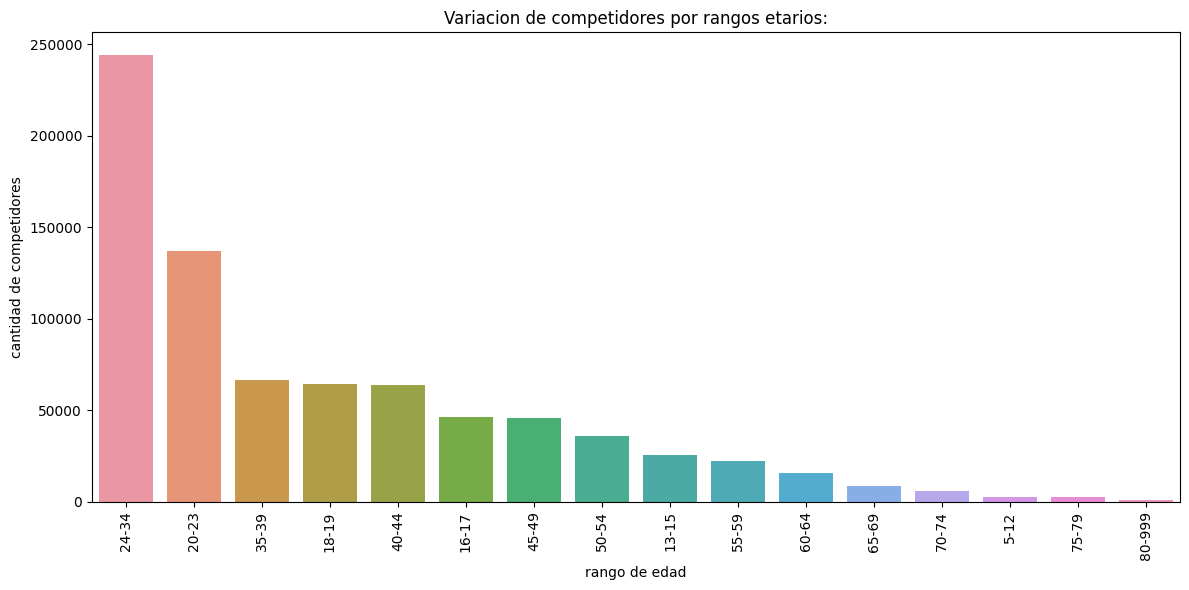

In [29]:
# Create bars
plt.figure(figsize=(12, 6))  # Ajusta el tamaño si tienes muchas columnas
sns.barplot(data=competidores_por_grupo_edad, x='AgeClass', y='Cantidad de competidores')
plt.xticks(rotation=90)  # Rota etiquetas para que no se encimen
plt.title('Variacion de competidores por rangos etarios:')
plt.xlabel('rango de edad')
plt.ylabel('cantidad de competidores')
plt.tight_layout()
plt.show()

1.progreso de fuerza para los atletas dentro de la categoria con mayor cantida de competidores

In [30]:
hombres = df[df['Sex'] != 'F']
mujeres = df[df['Sex'] != 'M']

In [31]:
#ahora para ambos sexos elegimos los valores mas altos por cada clase de edad:
hombres_top = hombres.loc[hombres.groupby('AgeClass')['IPFPoints'].idxmax()]
mujeres_top = mujeres.loc[mujeres.groupby('AgeClass')['IPFPoints'].idxmax()]
#datos para graficar
Gh = hombres_top[["AgeClass", "IPFPoints", "Sex"]]
Gm = mujeres_top[["AgeClass", "IPFPoints", "Sex"]]
mujeres_top

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName,Year
761974,Mahailya Reeves,F,B,Raw,15.000000,13-15,Class 1A,139.89,67.109295,NaN,...,105.46,921.68,Yes,NaN,FHSAA,2019-01-25,USA,FL,Class 1A Region 2 Meet,2019
761270,Mahailya Reeves,F,B,Raw,15.500000,16-17,Class 1A,140.52,67.109295,NaN,...,106.84,932.16,Yes,NaN,FHSAA,2019-02-08,USA,FL,Florida State Finals,2019
646602,Febrose Tsiode,F,B,Raw,19.000000,18-19,Juniors,57.40,58.000000,NaN,...,122.44,970.84,Yes,Nauru,WP,2018-10-10,USA,VA,World Powerlifting Championships,2018
845756,Chakera Ingram,F,SBD,Wraps,23.000000,20-23,Open,78.70,82.500000,NaN,...,583.66,1128.71,NaN,USA,USPA,2018-05-12,USA,CA,Kern US Open,2018
1401059,April Mathis,F,B,Raw,28.000000,24-34,Pro Open,120.20,67.109295,NaN,...,138.85,1207.48,NaN,USA,RPS,2016-05-28,USA,FL,Redemption III,2016
553371,Fatma Omar,F,B,Raw,38.500000,35-39,Open,54.86,56.000000,NaN,...,150.26,1160.55,Yes,Egypt,ParaPL,2012-08-29,England,NaN,Powerlifting at the London Paralympic Games,2012
1319695,Shannon Nash,F,B,Raw,44.000000,40-44,Open,83.64,90.000000,NaN,...,129.39,1124.33,NaN,USA,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...,2016
1319414,Shannon Nash,F,B,Raw,45.000000,45-49,Open,81.78,82.500000,NaN,...,136.60,1178.36,NaN,USA,365Strong,2017-04-22,USA,NC,Charlotte Europa Games,2017
225648,Maryana Naumova,F,B,Raw,12.000000,5-12,T,50.85,52.000000,NaN,...,87.21,684.38,NaN,Russia,WPA-RUS,2011-12-24,Russia,NaN,WPA Russia Cup,2011
1232320,Aida Agüero,F,B,Raw,53.000000,50-54,M3,67.80,75.000000,NaN,...,125.64,1044.34,NaN,Argentina,GPC,2015-09-13,USA,NV,World Championships,2015


In [32]:
concat = pd.concat([Gh, Gm])
concat

,AgeClass,IPFPoints,Sex
1365254,13-15,746.85,M
71872,16-17,976.64,M
553255,18-19,1084.76,M
552666,20-23,1128.57,M
553245,24-34,1245.93,M
553533,35-39,1226.88,M
554151,40-44,1225.98,M
937790,45-49,1189.80,M
1265997,5-12,787.66,M
613723,50-54,890.93,M


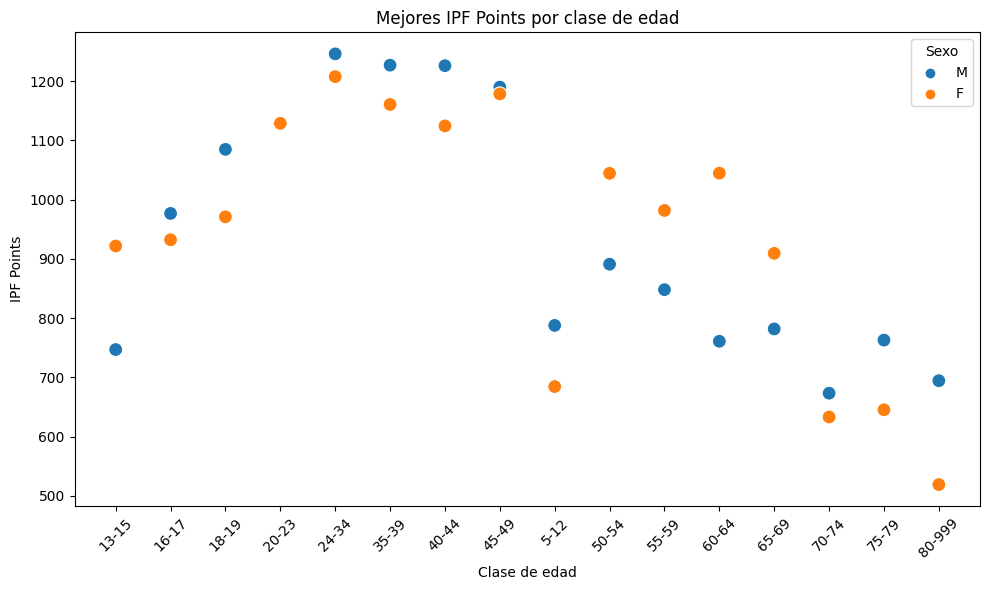

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=concat, x='AgeClass', y='IPFPoints', hue='Sex', s=100)

plt.title('Mejores IPF Points por clase de edad')
plt.xlabel('Clase de edad')
plt.ylabel('IPF Points')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

2. Progreso del mayor TotalKg a través de los años


In [34]:

progresoh = hombres.loc[hombres.groupby('Year')['TotalKg'].idxmax()]
progresom = mujeres.loc[mujeres.groupby('Year')['TotalKg'].idxmax()]


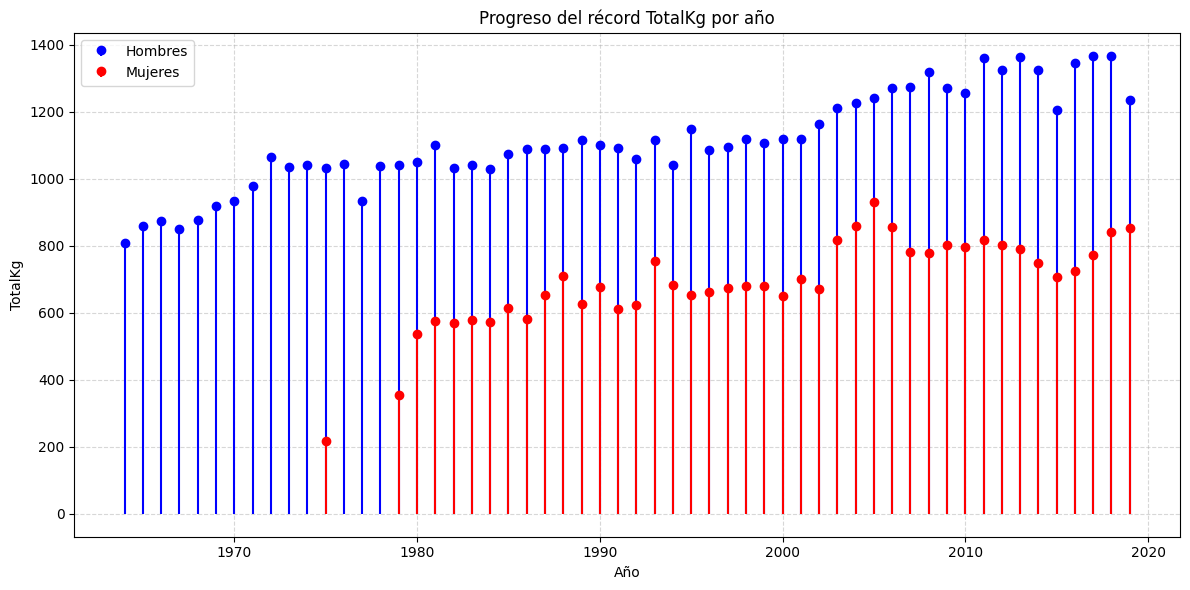

In [35]:
plt.figure(figsize=(12, 6))

# Hombres
plt.stem(progresoh['Year'], progresoh['TotalKg'], linefmt='b-', markerfmt='bo', basefmt=" ", label='Hombres')

# Mujeres
plt.stem(progresom['Year'], progresom['TotalKg'], linefmt='r-', markerfmt='ro', basefmt=" ", label='Mujeres')

plt.title("Progreso del récord TotalKg por año")
plt.xlabel("Año")
plt.ylabel("TotalKg")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

3. Progreso del mayor IPFPoints a través de los años

In [36]:

progresoh2 = hombres.loc[hombres.groupby('Year')['IPFPoints'].idxmax()]
progresom2= mujeres.loc[mujeres.groupby('Year')['IPFPoints'].idxmax()]

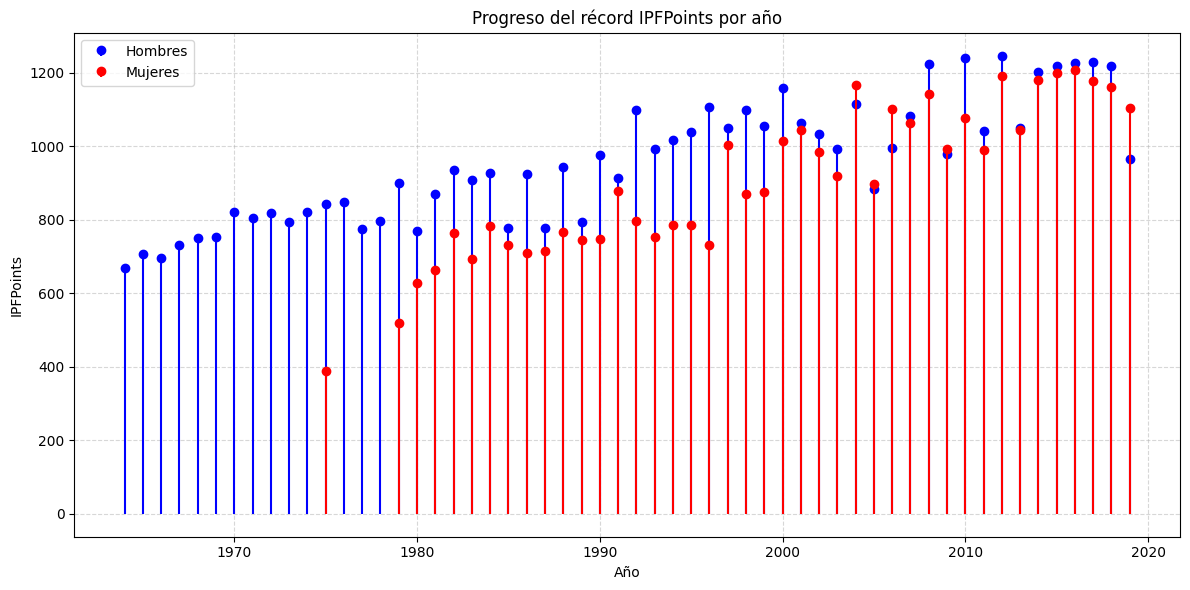

In [37]:
plt.figure(figsize=(12, 6))

# Hombres
plt.stem(progresoh2['Year'], progresoh2['IPFPoints'], linefmt='b-', markerfmt='bo', basefmt=" ", label='Hombres')

# Mujeres
plt.stem(progresom2['Year'], progresom2['IPFPoints'], linefmt='r-', markerfmt='ro', basefmt=" ", label='Mujeres')

plt.title("Progreso del récord IPFPoints por año")
plt.xlabel("Año")
plt.ylabel("IPFPoints")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

4. País que mandó más competidores
(las personas que no tienen un pais registrado no se toman en cuanta para este analisis)

In [38]:
conteo_paises = df['Country'].value_counts().reset_index()
conteo_paises.columns = ['País', 'Cantidad']
df_usuario = conteo_paises

fig = px.choropleth(df_usuario,
                    locations="País", 
                    locationmode="country names", 
                    color="Cantidad",            
                    hover_name="País",   
                    color_continuous_scale=px.colors.sequential.Plasma, 
                    title="Mapa Coroplético de competidores por pais"
                   )

fig.update_layout(geo=dict(showcoastlines=True))
fig.show()

Podemos notar qaue la mayoria de competidores provienen de los estados unidos, donde tambien se realizan el 53% de los eventos

5. Ranking de países con más cantidad de top 1


In [39]:
dfprueba = df.dropna(subset=['WeightClassKg', 'TotalKg', 'Year', 'Country'])

# Obtenemos los top 1 por categoría y año
top_lifts = dfprueba.loc[dfprueba.groupby(['Year', 'WeightClassKg'])['TotalKg'].idxmax()]
ranking_paises = top_lifts['Country'].value_counts().reset_index()
ranking_paises.columns = ['Country', 'Top1_Count']

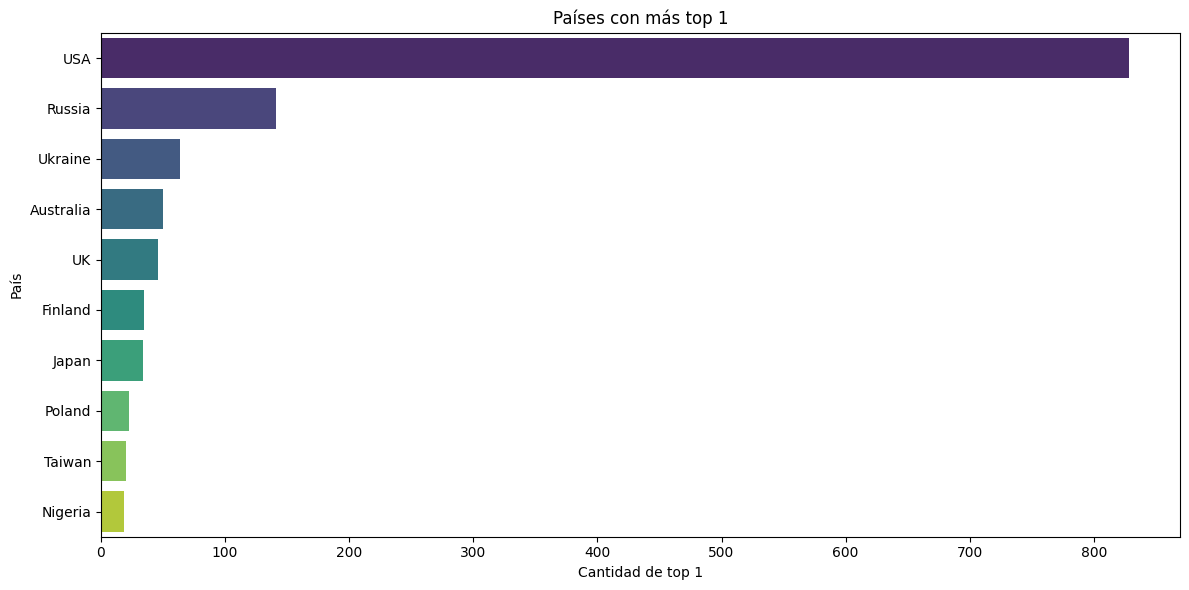

In [40]:

plt.figure(figsize=(12, 6))
sns.barplot(data=ranking_paises.head(10), x='Top1_Count', y='Country', palette='viridis')

plt.title('Países con más top 1')
plt.xlabel('Cantidad de top 1')
plt.ylabel('País')
plt.tight_layout()
plt.show()

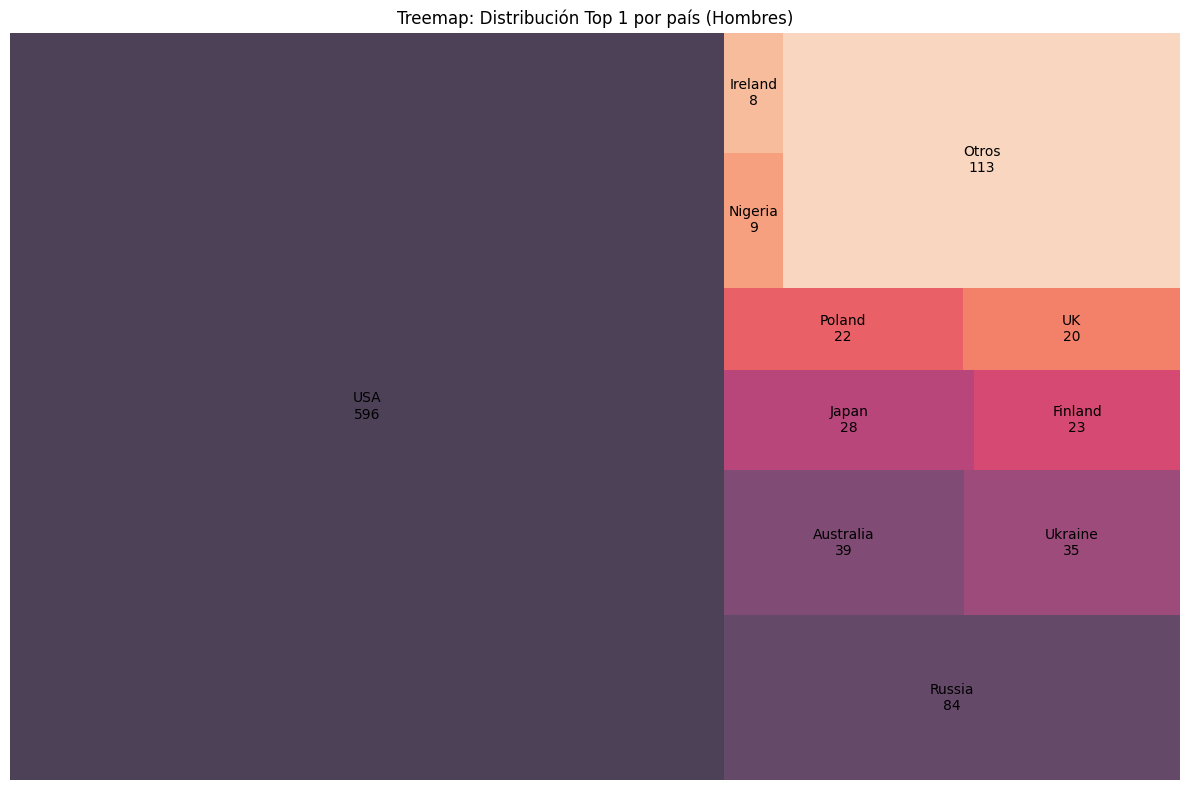

In [41]:
# Contamos top 1 por país y sexo
top1_by_sex = top_lifts.groupby(['Sex', 'Country']).size().reset_index(name='Top1_Count')
# Top 10 países por sexo
top_n = 10

# Hombres
top_m = top1_by_sex[top1_by_sex['Sex'] == 'M'].sort_values('Top1_Count', ascending=False)
top_m_main = top_m[:top_n]
top_m_others = pd.DataFrame({
    'Sex': ['M'],
    'Country': ['Otros'],
    'Top1_Count': [top_m['Top1_Count'][top_n:].sum()]
})
m_data = pd.concat([top_m_main, top_m_others])

# Mujeres
top_f = top1_by_sex[top1_by_sex['Sex'] == 'F'].sort_values('Top1_Count', ascending=False)
top_f_main = top_f[:top_n]
top_f_others = pd.DataFrame({'Sex': ['F'], 'Country': ['Otros'],'Top1_Count': [top_f['Top1_Count'][top_n:].sum()]
})
f_data = pd.concat([top_f_main, top_f_others])
colors = sns.color_palette("rocket", len(m_data))
# Treemap para hombres
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=m_data['Top1_Count'],
    label=m_data['Country'] + "\n" + m_data['Top1_Count'].astype(str),
    color= colors,
    alpha=0.8
)
plt.axis('off')
plt.title('Treemap: Distribución Top 1 por país (Hombres)')
plt.tight_layout()
plt.show()



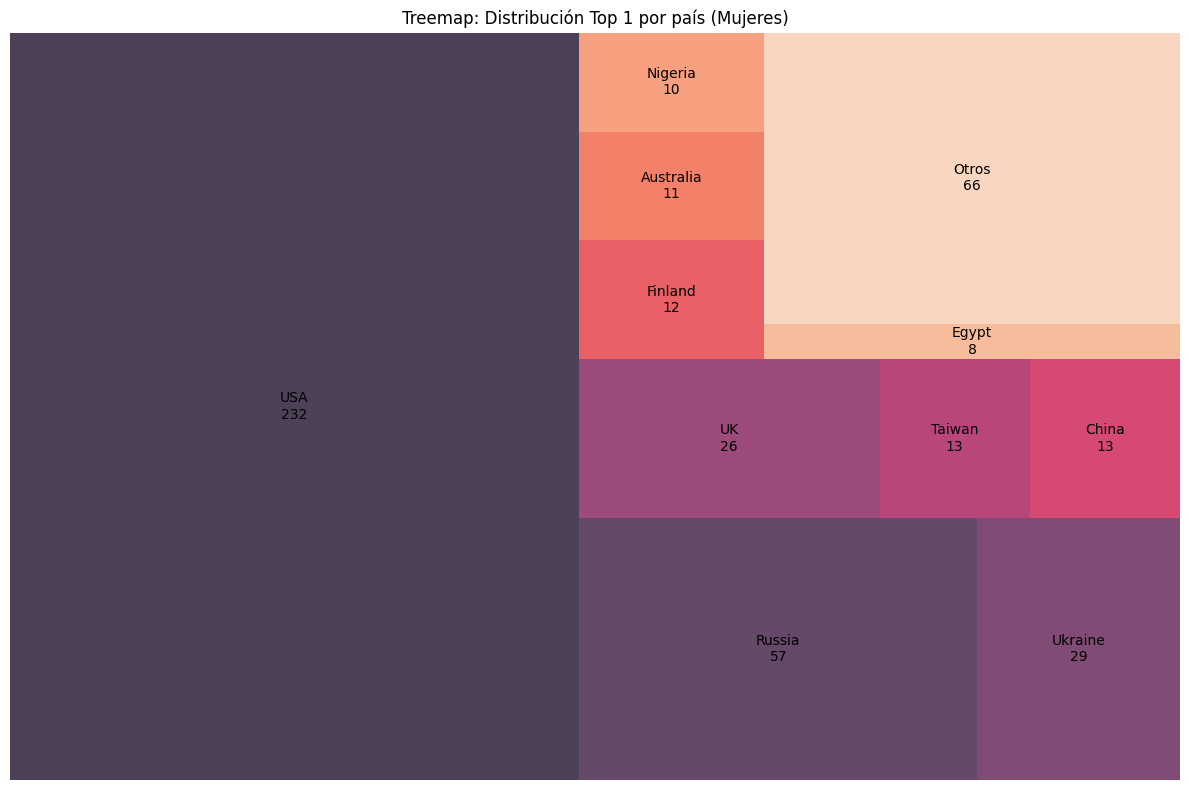

In [42]:
# Treemap para mujeres
colors = sns.color_palette("rocket", len(f_data))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=f_data['Top1_Count'],
    label=f_data['Country'] + "\n" + f_data['Top1_Count'].astype(str),
    color=colors,
    alpha=0.8
)
plt.axis('off')
plt.title('Treemap: Distribución Top 1 por país (Mujeres)')
plt.tight_layout()
plt.show()

En base a los datos obtenidos del previo analis exploratorio, podemos determinar que los atletas entre 23 y 30 años de edad que sean norteamericanos son los mas seguros a conseguir un primer puesto en las competencias (hay que tener en cuanta que si bien los norteamericanos son los que mayor tasa de victoria tiene tambien son los que mayopr cantidad de atletas envian a estas competencias)

¿A qué atletas conviene patrocinar?
A quién ofrecer un contrato.?

Calcular una probabilidad o score de "valor para patrocinio". Decidi abordar este puntaje teniendo en cuanta las siguientes cosas:
- Puntos IPF, que reflejan la fuerza relativa de la persona
- TotalKg, cantidad levantada en su meet
- una suma de sus mejores levantamientos realizados

In [43]:
#funcion sigmoide con corte en 30 (valor de 0.5), esto para poder poner una prioridad sobre la gente joven
edad_score =  1 / (1 + np.exp((df['Age'] - 34) / 5))



# Lógica adaptativa por levantamiento, dependiando si se realizo el movimiento y si se hizo de forma correcta, se toma en cuenta.
def lift_score(col):
    return df[col].apply(lambda x: 0.5 if pd.notna(x) and x > 0 else 0)

#muestra porcentualmente el rango de cada competidor independientemente del sexo.
df['Rank_TotalKg_by_sex'] = df.groupby('Sex')['TotalKg'].rank(pct=True)
df['Rank_Squat_by_sex'] = df.groupby('Sex')['Best3SquatKg'].rank(pct=True)
df['Rank_Bench_by_sex'] = df.groupby('Sex')['Best3BenchKg'].rank(pct=True)
df['Rank_Deadlift_by_sex'] = df.groupby('Sex')['Best3DeadliftKg'].rank(pct=True)

# Puntaje adaptativo de levantamientos (ya incluye si no levantó o falló)
squat_score = lift_score('Best3SquatKg') * df['Rank_Squat_by_sex']
bench_score = lift_score('Best3BenchKg') * df['Rank_Bench_by_sex']
deadlift_score = lift_score('Best3DeadliftKg') * df['Rank_Deadlift_by_sex']

# SponsorScore ajustado por sexo
df['SponsorScore'] = (
    0.45 * df['IPFPoints'].rank(pct=True) +  # IPFPoints ya es balanceado por sexo
    0.15 * df['Rank_TotalKg_by_sex'] +
    0.07 * squat_score +
    0.05 * bench_score +
    0.05 * deadlift_score +
    0.13 * edad_score +
    0.10 * ((df['Year'] - df['Year'].min()) / (df['Year'].max() - df['Year'].min()))
)

In [55]:
df_top_SpSc = df.sort_values(by='SponsorScore', ascending=False)
df_top_SpSc.drop_duplicates("Name")


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Date,MeetCountry,MeetState,MeetName,Year,Rank_TotalKg_by_sex,Rank_Squat_by_sex,Rank_Bench_by_sex,Rank_Deadlift_by_sex,SponsorScore
741439,Mahailya Reeves,F,SBD,Raw,15.5,16-17,FR-T1,144.00,67.109295,200.0,...,2019-03-17,USA,FL,4th Annual Orlando Open Championships,2019,0.997265,0.995864,0.996333,0.990920,0.905185
720487,Daniella Melo,F,SBD,Raw,19.5,20-23,FR-Jr,83.50,84.000000,205.0,...,2018-10-11,USA,WA,Raw Nationals,2018,0.996714,0.993630,0.987076,0.998666,0.904919
921265,Kiera Aston,F,SBD,Wraps,20.0,20-23,FJ,73.60,75.000000,200.0,...,2019-04-07,England,NaN,Bristol Qualifier,2019,0.992500,0.992661,0.970427,0.990920,0.904609
720190,Kloie Doublin,F,SBD,Raw,19.5,20-23,FR-O,71.61,72.000000,170.0,...,2019-03-02,USA,OH,Arnold SBD Pro American,2019,0.986985,0.968312,0.973591,0.993401,0.903201
1392997,Andrew Hause,M,SBD,Wraps,20.0,20-23,Pro Juniors 20-23,118.48,125.000000,NaN,...,2018-11-03,USA,NC,Braggin' Rights,2018,0.997293,0.997161,0.956961,0.998725,0.902987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046165,W. Chapoton,M,SBD,Single-ply,42.5,40-44,Masters 1,109.60,110.000000,NaN,...,1982-09-04,USA,NC,World Masters Powerlifting Championships,1982,0.040585,0.149208,0.055396,0.131477,0.082620
1053140,Jasinto Molina,M,SBD,Single-ply,57.5,55-59,Masters 2,90.00,90.000000,NaN,...,1992-09-03,Australia,NSW,World Masters Powerlifting Championships,1992,0.040585,0.149208,0.055396,0.131477,0.081894
1033523,Egon Dudat,M,SBD,Single-ply,50.5,50-54,Masters 2,75.00,75.000000,NaN,...,1988-07-28,England,NaN,World Masters Powerlifting Championships,1988,0.040585,0.149208,0.055396,0.131477,0.078073
1033556,Erns Christiansen,M,SBD,Single-ply,57.5,55-59,Masters 2,110.00,110.000000,NaN,...,1988-07-28,England,NaN,World Masters Powerlifting Championships,1988,0.040585,0.149208,0.055396,0.131477,0.074621


esta variable SponsorScore creada a partir de los datos que obtuve despues de mi analisis exploratorio de los datos permite determinar de 0 a 1 cuanto conviene promocionar a alguien, el enfoque de esta variable es permitir a las empresas sponsor de equipamiento deportivo tener de fomra concisa un pantallaso del valor aproximado de cada competidor priorizando en regla general a las personas jovenes muy fuertes que tienen un camino bastante brilante por delante.

In [45]:
df_top_SpSc.to_csv("datos_entreno", index= False)

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import squarify

In [2]:
df_pt2 = pd.read_csv("https://media.githubusercontent.com/media/matiespinel/proyecto-coder/refs/heads/main/datos_entreno.csv")

In [3]:
df_pt2 =df_pt2.drop_duplicates("Name")

el objetivo de analisis es poder determinar el puesto de alguien a en base a sus levantamientos, ya que las compentecias de power suelen tomar varios dias 

In [4]:
df_pt2

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Date,MeetCountry,MeetState,MeetName,Year,Rank_TotalKg_by_sex,Rank_Squat_by_sex,Rank_Bench_by_sex,Rank_Deadlift_by_sex,SponsorScore
0,Mahailya Reeves,F,SBD,Raw,15.5,16-17,FR-T1,144.00,67.109295,200.0,...,2019-03-17,USA,FL,4th Annual Orlando Open Championships,2019,0.997265,0.995864,0.996333,0.990920,0.905185
1,Daniella Melo,F,SBD,Raw,19.5,20-23,FR-Jr,83.50,84.000000,205.0,...,2018-10-11,USA,WA,Raw Nationals,2018,0.996714,0.993630,0.987076,0.998666,0.904919
3,Kiera Aston,F,SBD,Wraps,20.0,20-23,FJ,73.60,75.000000,200.0,...,2019-04-07,England,NaN,Bristol Qualifier,2019,0.992500,0.992661,0.970427,0.990920,0.904609
7,Kloie Doublin,F,SBD,Raw,19.5,20-23,FR-O,71.61,72.000000,170.0,...,2019-03-02,USA,OH,Arnold SBD Pro American,2019,0.986985,0.968312,0.973591,0.993401,0.903201
8,Andrew Hause,M,SBD,Wraps,20.0,20-23,Pro Juniors 20-23,118.48,125.000000,NaN,...,2018-11-03,USA,NC,Braggin' Rights,2018,0.997293,0.997161,0.956961,0.998725,0.902987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422814,W. Chapoton,M,SBD,Single-ply,42.5,40-44,Masters 1,109.60,110.000000,NaN,...,1982-09-04,USA,NC,World Masters Powerlifting Championships,1982,0.040585,0.149208,0.055396,0.131477,0.082620
1422816,Jasinto Molina,M,SBD,Single-ply,57.5,55-59,Masters 2,90.00,90.000000,NaN,...,1992-09-03,Australia,NSW,World Masters Powerlifting Championships,1992,0.040585,0.149208,0.055396,0.131477,0.081894
1422825,Egon Dudat,M,SBD,Single-ply,50.5,50-54,Masters 2,75.00,75.000000,NaN,...,1988-07-28,England,NaN,World Masters Powerlifting Championships,1988,0.040585,0.149208,0.055396,0.131477,0.078073
1422833,Erns Christiansen,M,SBD,Single-ply,57.5,55-59,Masters 2,110.00,110.000000,NaN,...,1988-07-28,England,NaN,World Masters Powerlifting Championships,1988,0.040585,0.149208,0.055396,0.131477,0.074621


In [6]:
df_pt2["Place"]

0           1
1           1
3           1
7           1
8           1
           ..
1422814    DQ
1422816    DQ
1422825    DD
1422833    DQ
1422840    DQ
Name: Place, Length: 412262, dtype: object

In [ ]:
df_pt2["Place"].unique()

array(['1', '4', '2', '3', '6', 'G', '8', '10', '5', '9', '7', '12', '13',
       '14', '18', '11', '15', '17', '16', '21', '19', '34', '20', '22',
       '30', '25', '27', '29', '28', '24', '31', '23', '33', '35', '32',
       '36', '41', '37', '26', '44', '39', '38', '42', '49', '53', '40',
       '43', '51', '47', '48', '52', '50', '55', '46', '64', '54', '45',
       '56', '57', '60', '63', '58', '67', '59', '66', '68', '61', '69',
       '74', '70', '62', '72', '75', '82', '90', '65', '76', '83', '95',
       '84', '73', '79', '85', '80', '89', '88', '87', '81', '97', '78',
       '92', '96', '93', '91', '94', '77', '98', '99', '86', '71', '101',
       '100', '102', '107', '103', '109', '110', '108', '113', '118',
       '111', '117', 'DQ', 'DD', 'NS'], dtype=object)

In [ ]:
df_clean = df_pt2[df_pt2['Place'].apply(lambda x: str(x).isdigit())].copy()
df_clean['Place'] = df_clean['Place'].astype(int)
df_clean['Place'].unique()



array([  1,   4,   2,   3,   6,   8,  10,   5,   9,   7,  12,  13,  14,
        18,  11,  15,  17,  16,  21,  19,  34,  20,  22,  30,  25,  27,
        29,  28,  24,  31,  23,  33,  35,  32,  36,  41,  37,  26,  44,
        39,  38,  42,  49,  53,  40,  43,  51,  47,  48,  52,  50,  55,
        46,  64,  54,  45,  56,  57,  60,  63,  58,  67,  59,  66,  68,
        61,  69,  74,  70,  62,  72,  75,  82,  90,  65,  76,  83,  95,
        84,  73,  79,  85,  80,  89,  88,  87,  81,  97,  78,  92,  96,
        93,  91,  94,  77,  98,  99,  86,  71, 101, 100, 102, 107, 103,
       109, 110, 108, 113, 118, 111, 117])

In [56]:
def asignar_rango(place):
    if place <= 3:
        return 'Top3'
    elif place <= 10:
        return 'Top10'
    else:
        return 'Resto'

df_clean['Rango'] = df_clean['Place'].apply(asignar_rango)
df_clean['Rango'].unique()


array(['Top3', 'Top10', 'Resto'], dtype=object)

usamos los mejor de los 3 pero no el cuarto ya que este no se tiene en cuanta para el puesto en competencia. 

C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


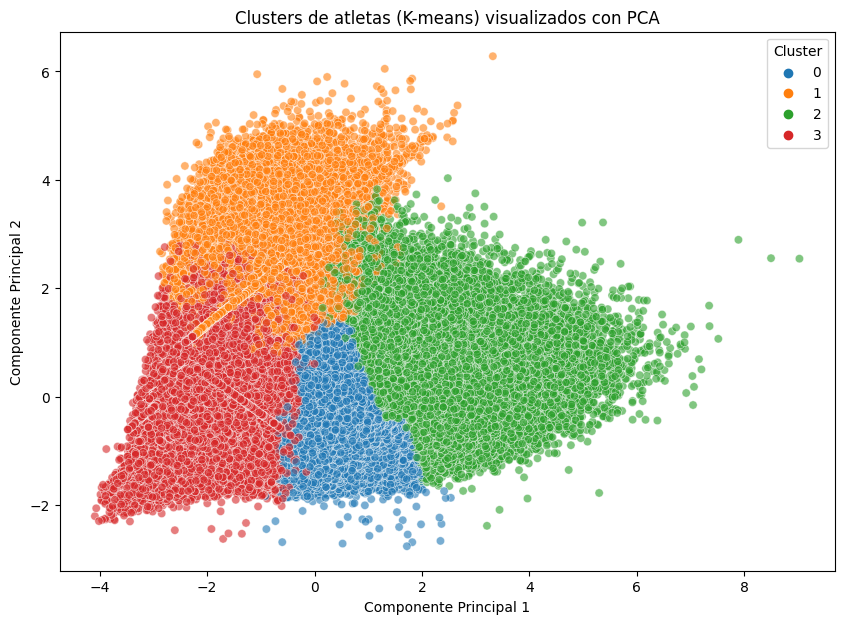

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Variables a usar
features = ['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'BodyweightKg', 'Age']

# Filtramos los casos con datos completos
df_filtered = df_clean.dropna(subset=features).copy()

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[features])

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA para visualización
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_filtered['PC1'] = components[:,0]
df_filtered['PC2'] = components[:,1]

# Visualización
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_filtered, 
    x='PC1', y='PC2', 
    hue='Cluster', 
    palette='tab10', 
    alpha=0.6
)
plt.title('Clusters de atletas (K-means) visualizados con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


Hipótesis visual:
Cluster	    | Posición en el gráfico	| Posible significado
Azul (0)	    Arriba a la izquierda	  Probablemente atletas livianos, o jóvenes con menos total, pero alta frecuencia de aparición
Rojo (3)	    Izquierda abajo	          Puede ser un grupo con menos levantamiento total, posiblemente masters o principiantes
Verde (2)	    Centro abajo	          Levantadores intermedios en peso y rendimiento
Naranja (1) 	Derecha	                  Levantadores más pesados o con mayor total

random Forest

In [58]:
lifts = ['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']
df_clean[lifts] = df_clean[lifts].fillna(0)
df_clean['BodyweightKg'] = df_clean['BodyweightKg'].fillna(df_clean['BodyweightKg'].mean())
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].mean())
X

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,BodyweightKg,Age,WeightClassKg,Equipment_Raw,Equipment_Single-ply,Equipment_Straps,Equipment_Wraps,Sex_M,RelativeStrength
0,237.5,162.50,210.0,144.00000,15.5,67.109295,True,False,False,False,False,4.236111
1,227.5,136.00,238.0,83.50000,19.5,84.000000,True,False,False,False,False,7.203593
3,225.0,117.50,210.0,73.60000,20.0,75.000000,False,False,False,True,False,7.506793
7,185.0,120.00,215.0,71.61000,19.5,72.000000,True,False,False,False,False,7.261556
8,407.5,225.00,370.0,118.48000,20.0,125.000000,False,False,False,True,True,8.461344
...,...,...,...,...,...,...,...,...,...,...,...,...
1418788,0.0,50.00,0.0,90.00000,79.0,90.000000,True,False,False,False,True,0.555556
1419138,0.0,30.00,0.0,75.00000,75.0,75.000000,True,False,False,False,True,0.400000
1419466,0.0,27.50,32.5,60.00000,49.0,60.000000,True,False,False,False,False,1.000000
1421318,0.0,142.88,0.0,83.49976,64.0,89.876001,True,False,False,False,True,1.711143


In [59]:
categorias = ['Equipment', 'Sex']

df_encoded = pd.get_dummies(df_clean, columns=categorias, drop_first=True)
features = [
    'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
    'BodyweightKg', 'Age', 'WeightClassKg'
] + [col for col in df_encoded.columns if any(cat in col for cat in categorias)]




In [60]:
df_encoded['RelativeStrength'] = (
    df_encoded['Best3SquatKg'] + df_encoded['Best3BenchKg'] + df_encoded['Best3DeadliftKg']
) / df_encoded['BodyweightKg']
features.append('RelativeStrength')


In [61]:
X = df_encoded[features]
y = df_encoded['Rango']  

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Evaluación
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       Resto       0.40      0.16      0.23      5314
       Top10       0.52      0.41      0.46     22087
        Top3       0.76      0.88      0.81     50922

    accuracy                           0.70     78323
   macro avg       0.56      0.48      0.50     78323
weighted avg       0.67      0.70      0.67     78323

[[  869  2442  2003]
 [  963  9021 12103]
 [  351  5968 44603]]


problema del modelo:

¿Qué significa?
Resto:
Solo se clasificaron bien 869 casos de 5314 reales (malísimo recall: 0.16).
La mayoría se están yendo a Top10 o Top3.

Top10:
De los 22087 verdaderos, solo 9021 fueron bien clasificados (recall 0.41).
Hay mucho error hacia Top3 (se confunden 12103 casos).

Top3:
Es la clase mejor clasificada. De 50922 reales, se predijeron bien 44603 (recall 0.88).
El modelo está sesgado hacia Top3.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Modelo base
clf = RandomForestClassifier(random_state=42)

# Parámetros para RandomizedSearch
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=1
)

# Ajustar búsqueda
random_search.fit(X, y)

# Resultados
print("Mejores parámetros:", random_search.best_params_)
print("Mejor score F1 macro:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time= 1.7min
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time= 1.8min
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time= 1.7min
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time= 1.7min
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time= 1.7min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=171; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=171; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=171; to

C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    The target variable to try to predict in the case of
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\usuario\AppData\Local\Packages\Pyth

Mejores parámetros: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 89}
Mejor score F1 macro: 0.49343556637633645


In [66]:
from sklearn.ensemble import RandomForestClassifier

best_params = {
    'max_depth': 18,
    'max_features': 'log2',
    'min_samples_leaf': 4,
    'min_samples_split': 7,
    'n_estimators': 89,
    'random_state': 42
}

# Instanciar el modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(**best_params)

# Entrenar el modelo con todos los datos (o solo con el train si tenés)
best_model.fit(X, y)  # o X_train, y_train si separaste test

# Ahora podés hacer predicciones
y_pred = best_model.predict(X_test)  # si tenés test separado

# Evaluar el modelo con las métricas que quieras
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Resto       0.63      0.16      0.25      5314
       Top10       0.66      0.42      0.51     22087
        Top3       0.77      0.95      0.85     50922

    accuracy                           0.74     78323
   macro avg       0.68      0.51      0.54     78323
weighted avg       0.73      0.74      0.71     78323

